In [1]:
import os
import random
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# Current notebook folder
notebook_path = Path().resolve()

# Original dataset (with images/masks)
original_dir = notebook_path.parent / "data" / "covid_xray"

# Destination for processed dataset
base_dir = notebook_path.parent / "data" / "covid_processed"

# Classes
classes = ["COVID", "Lung_Opacity", "Viral Pneumonia", "Normal"]

# Splits
splits = ["train", "val", "test"]

In [7]:
for split in splits:
    for cls in classes:
        path = base_dir / split / cls
        path.mkdir(parents=True, exist_ok=True)

print("Folder structure created!")

Folder structure created!


In [8]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for cls in classes:
    cls_folder = original_dir / cls / "images"  # <-- POINT TO images FOLDER
    files = [f for f in os.listdir(cls_folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    random.shuffle(files)
    
    n_total = len(files)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)
    n_test = n_total - n_train - n_val
    
    for i, file in enumerate(files):
        src = cls_folder / file
        if i < n_train:
            dst = base_dir / "train" / cls / file
        elif i < n_train + n_val:
            dst = base_dir / "val" / cls / file
        else:
            dst = base_dir / "test" / cls / file
        shutil.copyfile(src, dst)

print("Dataset split completed!")

Dataset split completed!


In [9]:
for split in splits:
    print(f"\n{split.upper()}:")
    for cls in classes:
        path = base_dir / split / cls
        count = len(os.listdir(path))
        print(f"{cls}: {count} images")


TRAIN:
COVID: 2892 images
Lung_Opacity: 4809 images
Viral Pneumonia: 1076 images
Normal: 8153 images

VAL:
COVID: 361 images
Lung_Opacity: 601 images
Viral Pneumonia: 134 images
Normal: 1019 images

TEST:
COVID: 363 images
Lung_Opacity: 602 images
Viral Pneumonia: 135 images
Normal: 1020 images


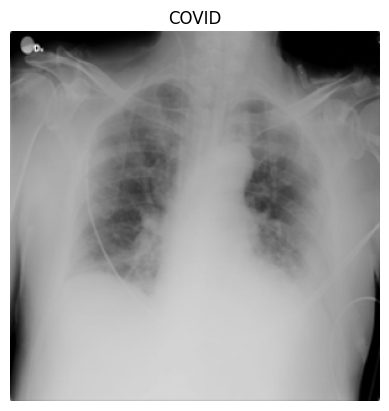

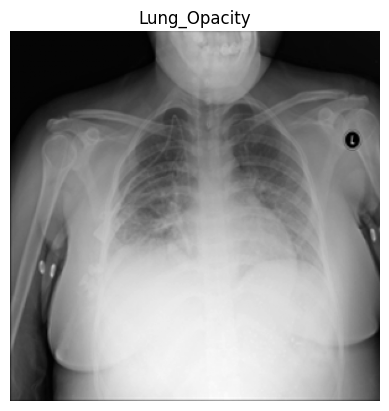

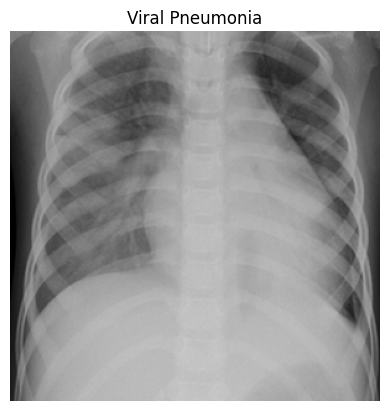

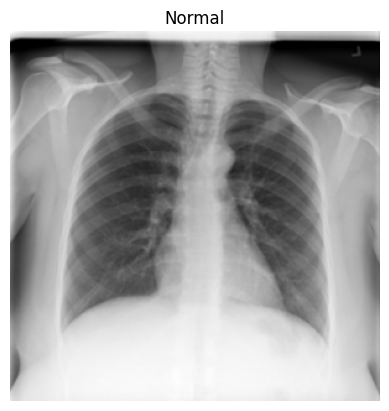

In [10]:
for cls in classes:
    img_folder = base_dir / "train" / cls
    sample_img = os.listdir(img_folder)[0]
    img_path = img_folder / sample_img
    
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(cls)
    plt.axis('off')
    plt.show()

In [11]:
IMG_SIZE = 224

def preprocess_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0   # normalize
    return img_array